Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Load data set

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Shape of the data set(no of rows & no of columns)

In [3]:
df.shape

(7043, 21)

Read the data set

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Data Cleaning

In [5]:
#drop the column 'customerID' - for the churn prediction it is not necessary
df.drop('customerID',axis='columns',inplace=True) 

#check the available columns after droping 'customerID'
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Check & Handle Missing Values/Duplicated Data

In [6]:
#'MonthlyCharges' & 'TotalCharges' are both currency but 'MonthlyCharges' data type=float &	'TotalCharges' data type=object 
#to correct that (error)
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
#pd.to_numeric(df.TotalCharges) --- can't directly convert into numeric because it contains null values
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#exclude rows with 'TotalCharges' culomns contains white space
df1=df[df.TotalCharges!=' ']

In [9]:
df1.shape

(7032, 20)

In [10]:
#transform 'TotalCharge' column to float
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\1803700096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df1.duplicated().sum()

22

Observations:-
The raw data contains 21 columns with 7,043 rows-

After checking, there are no duplicated data; however,it was found that 11 columns of TotalCharges contain white spaces and need to be remo ed. Consequently, there are 7,032 rows remainn-g.

The TotalCharges column has an inappropriate data type and needs to be converted to f-oat.

Except for the columns SeniorCitizen, Tenure, MonthlyCharges, and TotalCharges, all other columns are categorical columns.

Exploratory Data Analysis(EDA)
1.Statistical Summary2.
Univariate Analysis3.
Bivariate and Multivariate Analysi4.s
Deep Dive Explorati5.on
EDA Conclnusio

1.Statistical Summary

In [14]:
numerical_features = []
categorical_features = []

for i in df1.columns:
    if (df1[i].dtype == 'object'):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [15]:
numerical_summary = df1[numerical_features].describe()
numerical_summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
cols = numerical_features
for col in cols:
  print(f"Value counts of {col} column")
  print(df1[col].value_counts(), '\n')

Value counts of SeniorCitizen column
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 

Value counts of tenure column
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64 

Value counts of TotalCharges column
TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64 



Observation:
-Overall, the minimum and maximum values make sense for each column
-SeniorCitizen column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
-Tenure, MonthlyCharges, and TotalCharges are discrete with continue values
-Tenure and TotalCharges are positively skewed distribution
-MonthlyCharges has negatively skewed distribution

In [17]:
categorical_summary = df1[categorical_features].describe()
categorical_summary

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [18]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categorical_features:
  print(f"Value counts of {col} column")
  print(df1[col].value_counts(), '\n')

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value counts of InternetService column
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value counts of OnlineSecurity column
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

Value counts of OnlineBackup column
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: i

Observastions:
-Partner, Dependents, PhoneService, and Churn have 2 unique values: 'yes' and 'no', whereas gender has 2 unique values: 'Male' and 'Female'.
-MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV, StreamingMovies, and Contract have 3 unique values.
-PaymentMethod has 4 unique values: Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic).
-A total of 1520 customers do not have internet service.
-The majority of customers choose a Contract of month-to-month with PaperlessBilling using the PaymentMethod of electronic check.

2.Univariate Analysis

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\2500412039.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\2500412039.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\2500412039.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


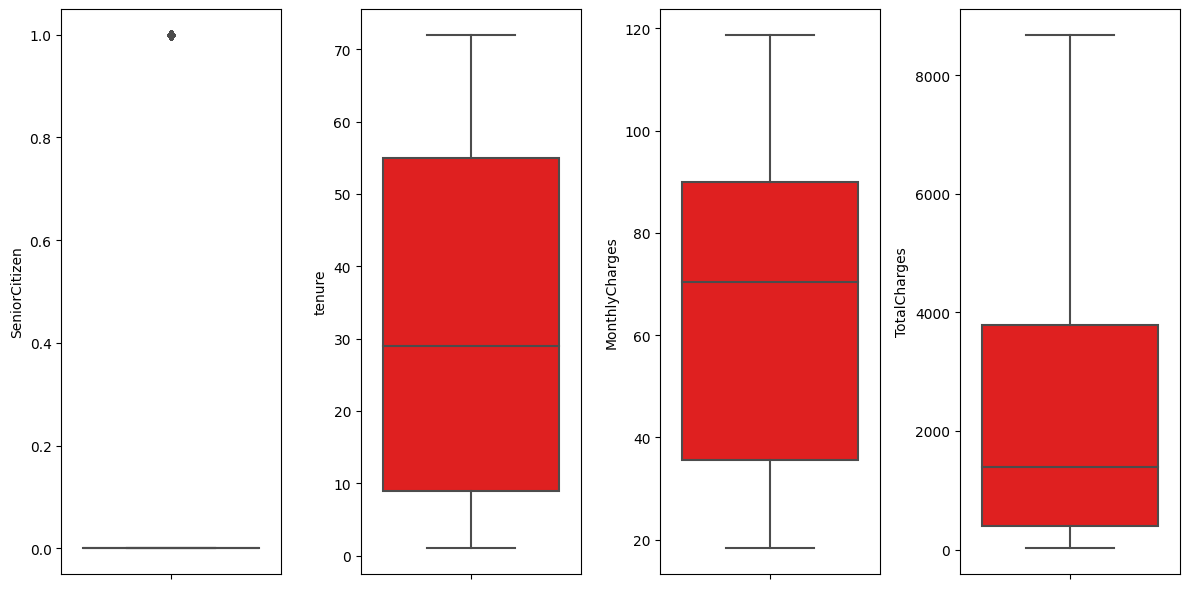

In [19]:
#Boxplot to Detect Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical_features
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df1[features[i]], color='red')
    plt.tight_layout()

In [20]:
# check the outlier full profile
outlier = df1['SeniorCitizen'].max()

df1[df1['SeniorCitizen'] == outlier]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


Observation:
-No outlier data was found in the Tenure, MonthlyCharges, and TotalCharges columns
-There are a total of 1142 outliers in the SeniorCitizen column due to its data type being boolean, which only contains values 0 or 1. This can be left as it is

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\4063333226.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\4063333226.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\4063333226.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


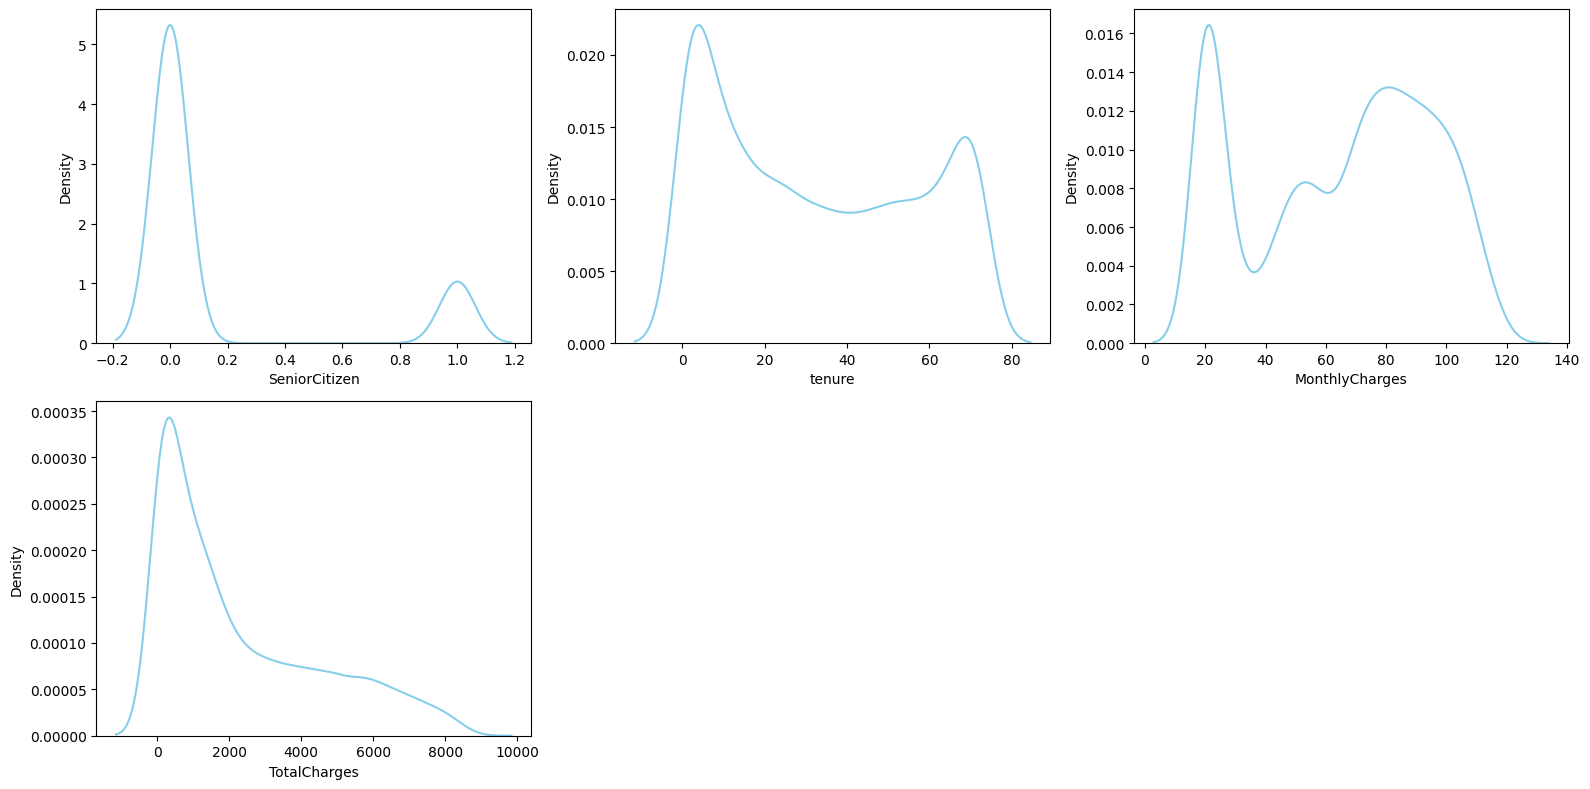

In [21]:
#KDE Plot for Knowing The Distribution Form
# adjust the figure size for better readability
plt.figure(figsize=(16,8))

features = numerical_features
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x = df1[features[i]], color = 'skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
-We can ignore interpreting feature columns with limited discrete values such as SeniorCitizen
-most customers are (distribution peak):
    Senior citizen
    5 months tenure
    20 dollars monthly charges
    100 dollars total charges

3.Bivariate and Multivariate Analysis

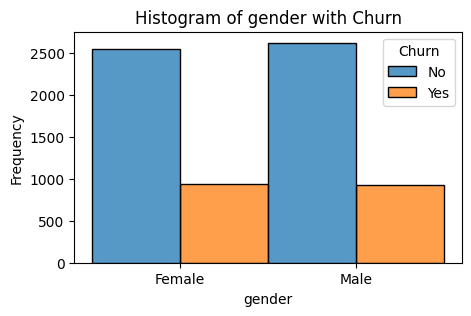

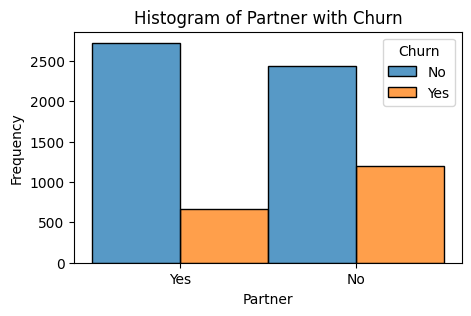

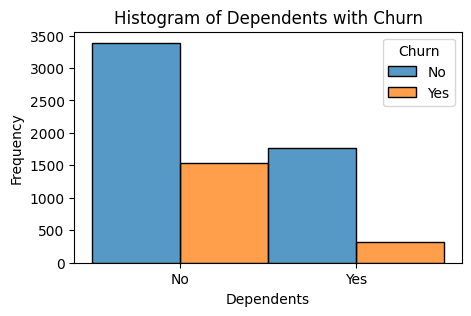

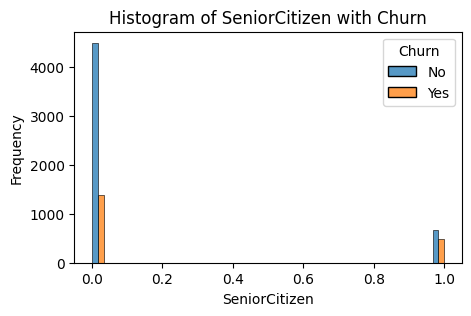

In [22]:
def create_histograms(df1, features):
    for feature in features:
        plt.figure(figsize=(5, 3))
        sns.histplot(data = df1, x = feature, hue = 'Churn', multiple = 'dodge', bins=30)
        plt.title(f'Histogram of {feature} with Churn')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

features = ["gender","Partner","Dependents","SeniorCitizen"]
create_histograms(df1, features)

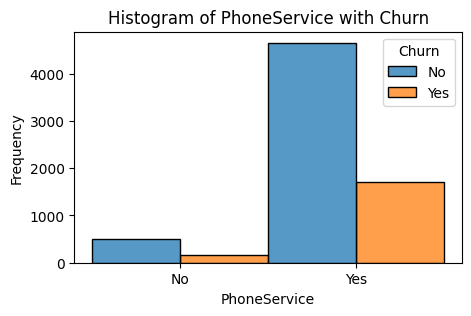

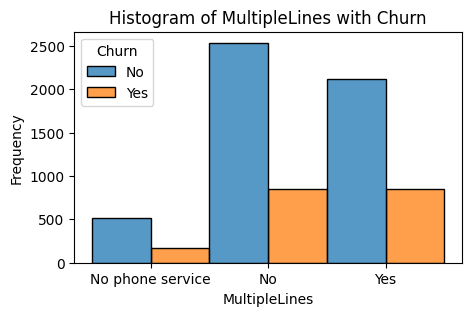

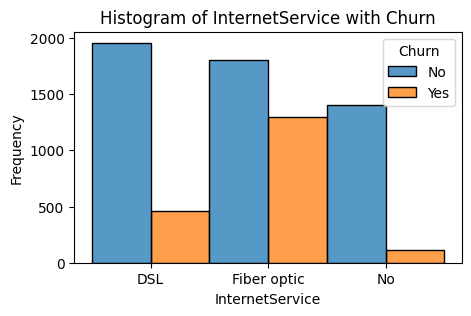

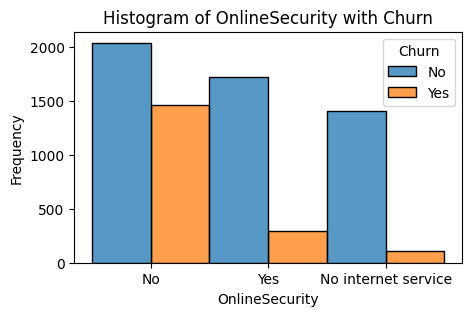

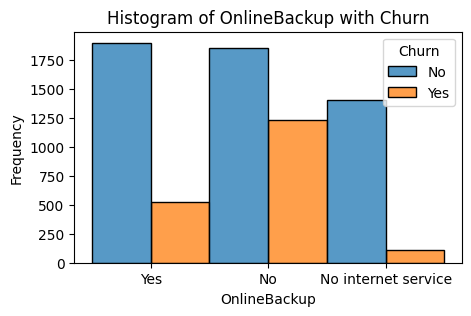

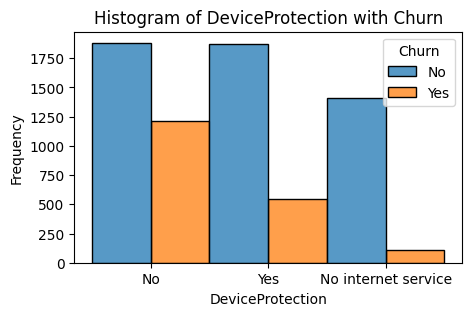

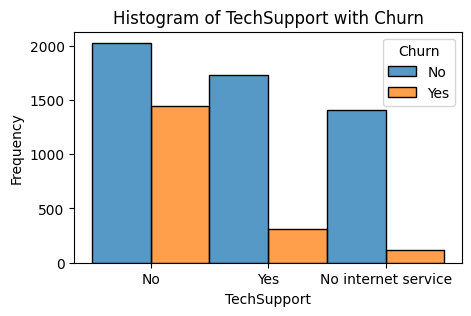

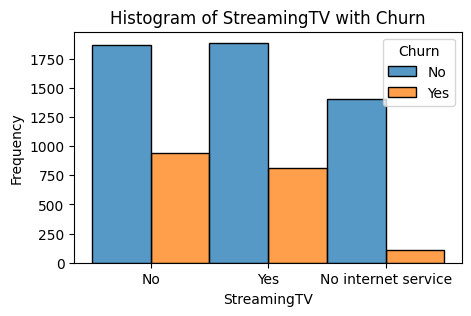

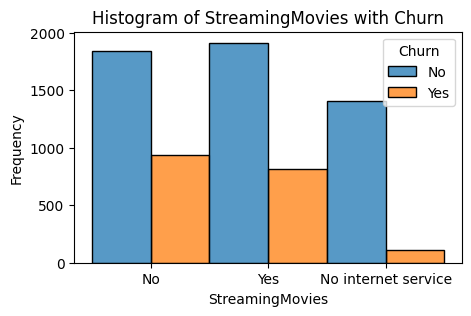

In [23]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
create_histograms(df1, features)

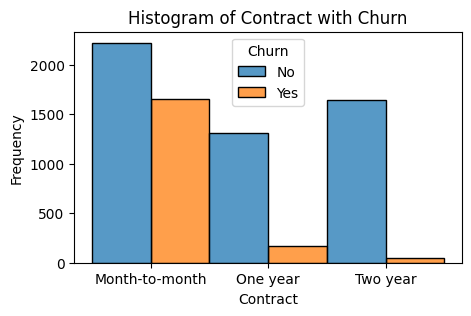

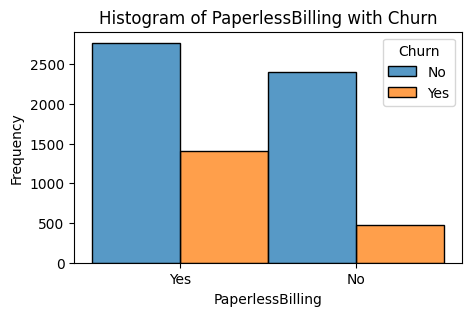

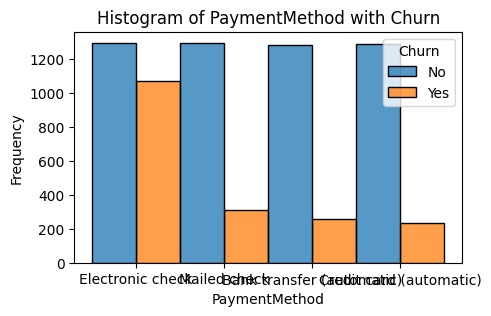

In [24]:
features = ["Contract","PaperlessBilling","PaymentMethod"]
create_histograms(df1, features)

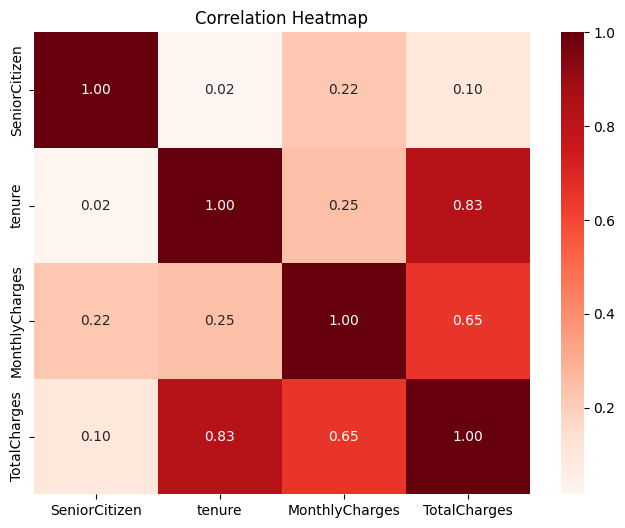

In [25]:
# correlation heatmap
numeric_df = df1.select_dtypes(include=['number'])  #Selects only numeric columns
correlation = numeric_df.corr()
plt.figure(figsize=(8, 6))
plt.title("Correlation Heatmap")
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="Reds")
plt.show()

Observation:
-It can be concluded that there is a relatively high correlation between tenure and TotalCharges, as well as between MonthlyCharges and TotalCharges

C:\Users\hasi_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


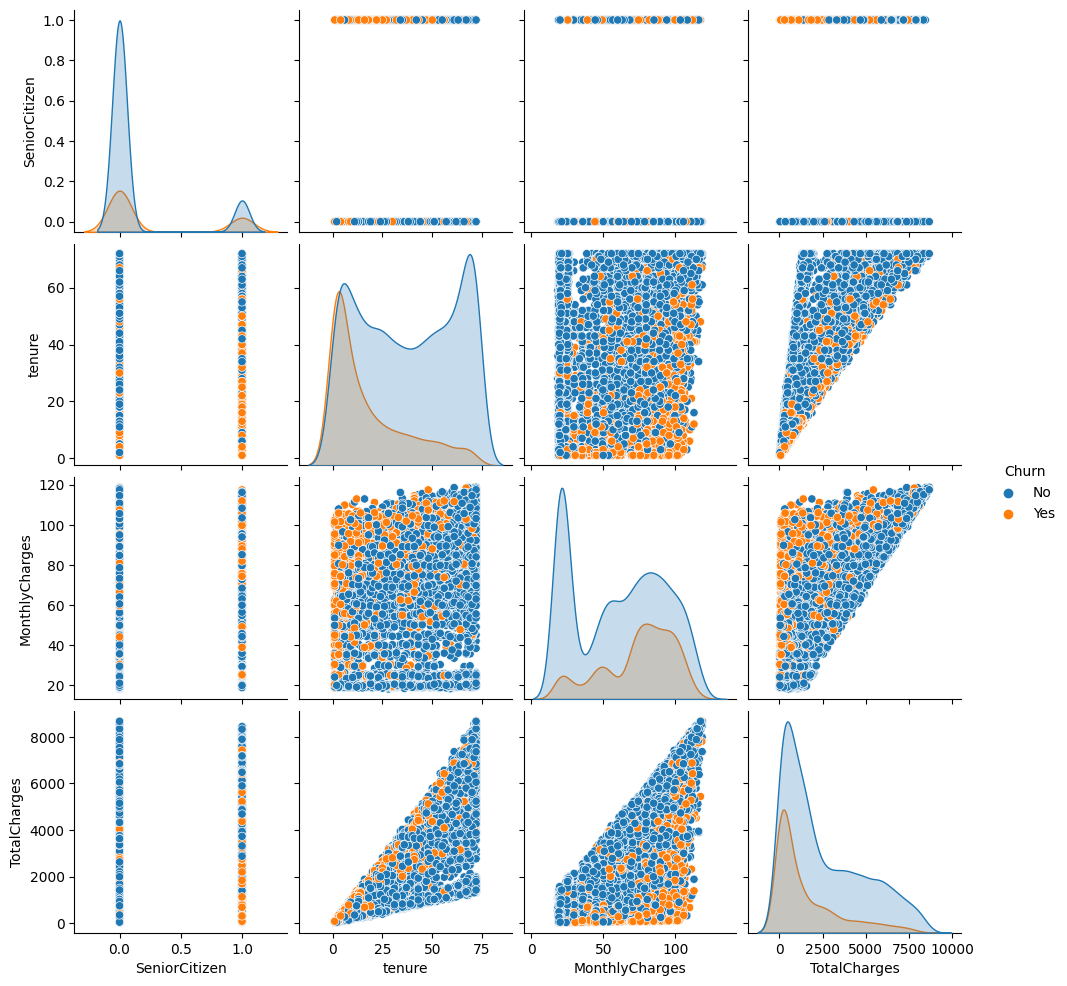

In [26]:
# pairplot of the data
sns.pairplot(df1, hue = 'Churn')

Observations:
-The data does not provide meaningful insight, because it is not well differentiated
-senior citizen decides to unsubscribe with short tenure
-customers tend to stop subscribing at the beginning of the tenure with high monthly charges

4.Deep Dive Exploration

In [27]:
#Does the internet service provider affect tenure and monthly charges?
tenure_by_internet = df.groupby('InternetService').agg(
    mean_tenure = ('tenure','mean'),
    mean_monthlycharges = ('MonthlyCharges', 'mean')).reset_index()
tenure_by_internet

,InternetService,mean_tenure,mean_monthlycharges
0,DSL,32.821561,58.102169
1,Fiber optic,32.917959,91.500129
2,No,30.547182,21.079194


Observation:
-It can be observed that users with a fiber optic internet service provider subscribe for a longer period compared to DSL and those without an internet service. This could be due to the better quality, stability, and speed of fiber optic internet compared to others.

In [28]:
#Can the partners and dependents of customers affect their tenure and total charges?
agg_data = df1.groupby(['Partner','Dependents']).agg(
    mean_tenure = ('tenure', 'mean'),
    mean_totalcharges = ('TotalCharges', 'mean')
).reset_index()
agg_data

,Partner,Dependents,mean_tenure,mean_totalcharges
0,No,No,23.303354,1610.702439
1,No,Yes,23.986072,1349.768802
2,Yes,No,42.709014,3332.647157
3,Yes,Yes,41.578161,2746.914914


Observation:
-Based on the table above, it is known that the highest values of mean_totalcharges and mean_tenure are found in customers who have partners but do not have dependents.

EDA Conclusion:
-The raw dataset used contains missing values in the TotalCharge column, which contains white spaces, and its data type should be float but is identified as an object.
-There are no duplicate data entries.
-Gender does not have a significant impact on churn; both females and males have similar proportions of churn and non-churn customers.
-In the partner column, the highest churn rate is observed among customers who do not have a partner, while customers with partners tend to have lower churn rates.
-The presence or absence of dependents influences whether a customer churns or not. Customers without dependents are less likely to churn.
-Customers without internet services have lower monthly charges and shorter tenures compared to those with DSL and fiber optic services.
-The more services a customer subscribes to, the higher their total charges tend to be.

Data Preprocessing

In [29]:
#find out unique column values 
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [30]:
print_unique_col_values(df1) 

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
#replacing terms which have same meaning for the easiness of preprocessing
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\3764080146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\3764080146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [32]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [33]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\1255182669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

C:\Users\hasi_\AppData\Local\Temp\ipykernel_25428\2821839192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0}, inplace=True)


In [36]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [37]:
#One-hot encoding --> used to preprocess categorical data
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
774,0,0,1,0,33,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
6433,1,0,1,1,58,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4222,0,0,0,0,45,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
4979,1,0,1,1,56,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6379,0,0,0,0,10,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [39]:
for col2 in df2:
    print(f'{col2}: {df2[col2].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [41]:
#scales features to a specified range
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [42]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [44]:
df2.corr()['Churn']

gender                                     0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

In [ ]:
#download preprocessed data set
df2.to_csv(r'Preprocessed_data.csv', index = False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
#split data set to training data and testing data
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
print("Shape of Training set:",X_train.shape)
print("Shape of Testing set:",X_test.shape)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Save the fitted scaler to a file using pickle
import pickle

scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

1) Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_rf.predict(X_test))

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

2) Support vector classification(SVC)

In [ ]:
from sklearn.svm import SVC

# Define the model
svm_model = SVC()

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_svm.best_params_
print("Best Hyperparameters (SVM):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_svm.predict(X_test))

print("SVM Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

3) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define the model
nb_model = GaussianNB()

# No hyperparameters to tune for Gaussian Naive Bayes

# Fit the model
nb_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

print("Naive Bayes Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

4) Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_gb.best_params_
print("Best Hyperparameters (GradientBoostingClassifier):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_gb.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_gb.predict(X_test))

print("Gradient Boosting Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

5) Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Perform GridSearchCV
grid_search_dc = GridSearchCV(dt_model, param_grid, cv=5)
grid_search_dc.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_dc.best_params_
print("Best Hyperparameters (Decision Tree):", best_hyperparameters)

# Get the best model
best_dt_model = grid_search_dc.best_estimator_

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Observation :- From the above insights we can come to a conclusion that the Random forest classification method gives the best accuracy for the churn prediction.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of models
models = [
    ("Random Forest", grid_search_rf),
    ("SVM", grid_search_svm),
    ("Naive Bayes", nb_model),
    ("Gradient Boosting", grid_search_gb),
    ("Decision Tree", grid_search_dc),
]

# Loop through each model
for model_name, model in models:
    # Get model predictions
    predictions = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Create a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 16}, square=True,
                xticklabels=['Not Churn', 'Churn'],
                yticklabels=['Not Churn', 'Churn'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Display classification report
    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_test, predictions))


Saving the Random Forest model

In [ ]:
import pickle

# Save the grid_search_rf model to a file using pickle
model_filename = 'grid_search_rf_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(grid_search_rf, model_file)

Loading the saved model 

In [ ]:
# Load the saved model from the file
model_filename = 'grid_search_rf_model.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

loaded_model

ROC curve for Gradient Boosting model

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probabilities = loaded_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()